In [33]:
import tensorflow as tf

print(tf.__version__)

import torch
import torch.nn as nn
import torch.optim as optim

2.12.0


In [34]:
import pandas as pd

pd.set_option('display.width', None)
pd.set_option('display.max_rows', None)

In [35]:
import numpy as np

**Step 1. Import the data from the given .csv file (diabetes.csv). The first few columns contain the data while the last column is a binary class label of 0 or 1**

In [36]:
df = pd.read_csv('diabetes.csv', header=None)

print(df.head(5))

          0         1         2         3         4         5         6   
0 -0.294118  0.487437  0.180328 -0.292929  0.000000  0.001490 -0.531170  \
1 -0.882353 -0.145729  0.081967 -0.414141  0.000000 -0.207153 -0.766866   
2 -0.058824  0.839196  0.049180  0.000000  0.000000 -0.305514 -0.492741   
3 -0.882353 -0.105528  0.081967 -0.535354 -0.777778 -0.162444 -0.923997   
4  0.000000  0.376884 -0.344262 -0.292929 -0.602837  0.284650  0.887276   

          7  8  
0 -0.033333  0  
1 -0.666667  1  
2 -0.633333  0  
3  0.000000  1  
4 -0.600000  0  


**Step 2. Preprocess the data as you see fit and show basic data visualization for better understanding of data**

In [37]:
# Check if the dataset has any missing data points
df1 = df[df.isna().any(axis=1)]

print(df1.head(5))

Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8]
Index: []


In [38]:
def range_norm(ser):
    hi = 1
    low = 0
    max_val = ser.max()
    min_val = ser.min()

    ser = ser.apply(lambda x: (x - min_val) / (max_val - min_val) * (hi - low) + low)

    return ser

In [39]:
for c in range(0, 8):
    df[c] = range_norm(df[c])

print(df.head(5))

         0         1         2         3         4         5         6   
0  0.31250  0.670968  0.489796  0.304348  0.491587  0.314928  0.232449  \
1  0.00000  0.264516  0.428571  0.239131  0.491587  0.171779  0.114298   
2  0.43750  0.896774  0.408163  0.461957  0.491587  0.104295  0.251712   
3  0.00000  0.290322  0.428571  0.173913  0.096154  0.202454  0.035531   
4  0.46875  0.600000  0.163265  0.304348  0.185096  0.509203  0.943493   

          7  8  
0  0.474576  0  
1  0.152542  1  
2  0.169492  0  
3  0.491526  1  
4  0.186441  0  


In [40]:
df.describe()

,0,1,2,3,4,5,6,7,8
count,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000
mean,0.252182,0.498368,0.487416,0.306066,0.327097,0.291783,0.166237,0.229070,0.653491
std,0.205201,0.196701,0.125291,0.139073,0.190932,0.140907,0.141891,0.203793,0.476171
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.062500,0.354839,0.387755,0.195653,0.127404,0.191207,0.068493,0.050847,0.000000
50%,0.187500,0.464516,0.489796,0.304348,0.491587,0.290389,0.124144,0.169492,1.000000
75%,0.468750,0.619355,0.571428,0.461957,0.491587,0.374233,0.232234,0.372882,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
# Import plot library for visualization
import matplotlib.pyplot as plt

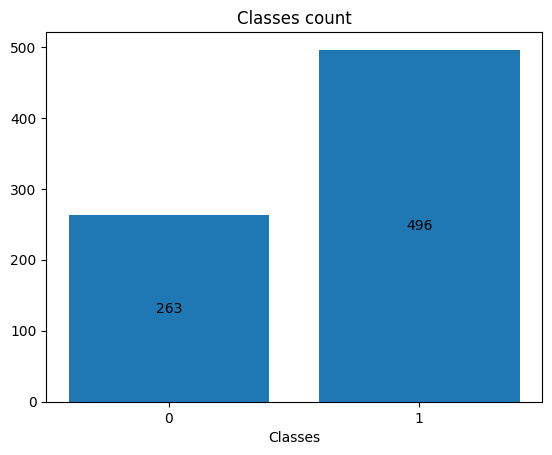

In [42]:
# Count how many classes there are in the dataset
_, ax = plt.subplots()

diabetes_class = ['0', '1']
counts = [df.loc[df[8] == 0, 8].count(), df.loc[df[8] == 1, 8].count()]

p = ax.bar(diabetes_class, counts, label=diabetes_class)
ax.bar_label(p, label_type='center')

ax.set_title('Classes count')
ax.set_xlabel('Classes')
plt.show()

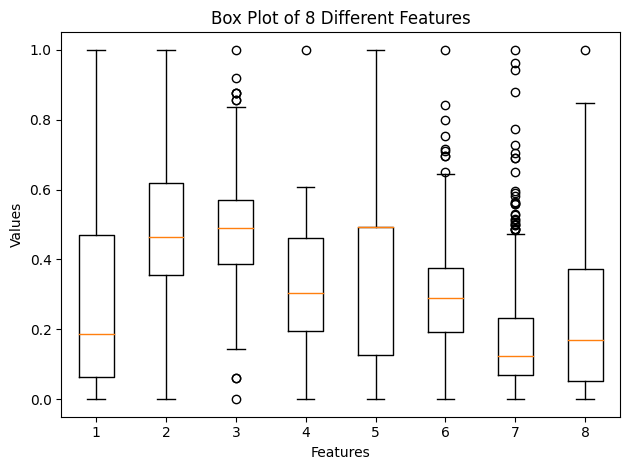

In [74]:
# plt.figure(figsize=(10, 6))
ax = plt.subplot(1, 1, 1)

data = df.drop(columns=[8]).to_numpy()
boxplot = ax.boxplot(data)

ax.set_title('Five-number summary on descriptive features')
ax.set_xlabel('Features')

# Display the plot
plt.tight_layout()
plt.show()

**Step 3. Split into 80% train 20% test**

In [44]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=[8])
y = df.loc[:, 8]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(607, 8)
(607,)
(152, 8)
(152,)


**Step 4. Modify the model shown in the demo to take the new data**

In [45]:
# Tensorflow
tf_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[8,])
    ])
tf_loss = tf.keras.losses.MeanSquaredError()
tf_model.compile(optimizer='SGD', loss=tf_loss, metrics=['mean_squared_error'])
print("------------------TensorFlow------------------")
tf_model.summary()

# pyTorch
pt_model = nn.Sequential(nn.Linear(8,1))
criterion = nn.MSELoss()
optimizer = optim.SGD(pt_model.parameters(), lr=0.01)
print()
print("------------------PyTorch------------------")
print(pt_model)

------------------TensorFlow------------------
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 9         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________

------------------PyTorch------------------
Sequential(
  (0): Linear(in_features=8, out_features=1, bias=True)
)


In [46]:
def pt_fit(model, inp, out, opti, crite, epoch, batch_size=None):
  input_tensor = torch.from_numpy(inp.astype(np.float32))
  output_tensor = torch.from_numpy(out.astype(np.float32))
  for epoch in range(epoch):
    permutation = torch.randperm(input_tensor.size()[0])
    if batch_size:
      for i in range(0, inp.shape[0], batch_size):
        indices = permutation[i : i + batch_size]

        pt_X = input_tensor[indices]
        pt_y_true = output_tensor[indices]

        opti.zero_grad()

        pt_y_pred = model(pt_X)
        loss = crite(pt_y_pred, pt_y_true)
        loss.backward()
        opti.step()
    else:
      pt_X = input_tensor[permutation]
      pt_y_true = output_tensor[permutation]

      opti.zero_grad()

      pt_y_pred = model(pt_X)
      loss = crite(pt_y_pred, pt_y_true)
      loss.backward()
      opti.step()

    print(f'{epoch + 1} loss: {loss}')

**Step 5. Train the model on the data**

In [47]:
# Tensorflow
tf_model.fit(X_train, y_train)

# PyTorch
inputs = X_train.to_numpy()
outputs = y_train.to_numpy().reshape(-1, 1)
pt_fit(pt_model, inputs, outputs, optimizer, criterion, 1)

print('Finished Training')

19/19 [==============================] - 0s 702us/step - loss: 0.3829 - mean_squared_error: 0.3829
1 loss: 0.6667465567588806
Finished Training


**Step 6. Make predictions on the test data and compare them to the test labels**

In [48]:
# TensorFlow
print("TensorFlow prediction")
tf_predict = tf_model.predict(X_test)
tf_predict = (tf_predict > 0.5).astype(int)
tf_predict = [p[0] for p in tf_predict]
tf_compare = pd.DataFrame({'Actual': y_test.tolist(), 'Prediction': tf_predict})
print(tf_compare.head(10))
print("-----------------------------------------------")

# PyTorch
print("PyTorch prediction")
pt_inputs = X_test.to_numpy()
pt_input_tensor = torch.from_numpy(pt_inputs.astype(np.float32))
pt_predict = pt_model(pt_input_tensor)
pt_predict = pt_predict.detach().numpy()
pt_predict = (pt_predict > 0.5).astype(int)
pt_predict = [p[0] for p in pt_predict]
pt_compare = pd.DataFrame({'Actual': y_test.tolist(), 'Prediction': pt_predict})
print(pt_compare.head(10))

TensorFlow prediction
5/5 [==============================] - 0s 874us/step
   Actual  Prediction
0       1           0
1       0           1
2       0           0
3       1           1
4       0           0
5       1           1
6       1           0
7       1           0
8       1           0
9       1           0
-----------------------------------------------
PyTorch prediction
   Actual  Prediction
0       1           0
1       0           0
2       0           0
3       1           0
4       0           0
5       1           0
6       1           0
7       1           0
8       1           0
9       1           0


**Step 7. Calculate the accuracy of your results**

In [49]:
from sklearn.metrics import accuracy_score
print("Tensorflow accuracy")
print(accuracy_score(y_test, tf_predict))

print()
print("PyTorch accuracy")
print(accuracy_score(y_test, pt_predict))


Tensorflow accuracy
0.34868421052631576

PyTorch accuracy
0.3092105263157895


**Step 8. Hypothesize changes you can make to the model. Type out your hypothesis as comments in the code or in a text cell. (ex. doubling the width/depth of your NN, experiment thoroughly)**

1. Add 2 extra layers and increase the neurons to 32
* The extra layers and neruons are most likely to increase the accuracy
2. Increase the epoch number to 3
* It can result with higher accuracy but could lead to overfitting because the model will be trained with the same data multiple times
3. Set batch size to 10 and 2 epoch
* This could lead to a higher accuracy because using batch size force the model to go through the dataset a piece at a time. Consequently, the model will be trained with multiple samples iteratively. In addition, giving a slightly larger epoch allow the model to be trained with a little more combination of data.
4. Use the activation functions rectified linear unit and sigmoid
* Using an activation function allow the model to decide whether a neuron needs to be activated. Sigmoid should do better since it returns a value between 0 to 1 while the ReLu returns 0 or above depending on the values.
5. Change the optimizer from SGD to Adam
* Adam optimizer has an adaptive learning rate that changes based on historical gradient magnitudes. It will give better rate of convergences and probably higher accuracy.
6. Change the loss function to binary cross-entropy
* The loss function calculates how much the prediction is different from the actual result. BCE handles binary classification better than MSE and thus should give a better accuracy.

**Step 9. Test your hypothesis by training your new models**

    1. Add 2 extra layers and increase the neurons to 32

In [50]:
# Tensorflow
tf_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, input_shape=[8,]),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(1)
    ])
tf_model.compile(optimizer='SGD', loss=tf_loss, metrics=['mean_squared_error'])

# pyTorch
pt_model = nn.Sequential(
    nn.Linear(8, 32),
    nn.Linear(32, 32),
    nn.Linear(32, 1),
)

In [51]:
# Tensorflow
tf_model.fit(X_train, y_train)
tf_predict = tf_model.predict(X_test)
tf_predict = (tf_predict > 0.5).astype(int)
tf_predict = [p[0] for p in tf_predict]
tf_compare = pd.DataFrame({'Actual': y_test.tolist(), 'Prediction': tf_predict})
print(tf_compare.head(10))
print("Tensorflow accuracy")
print(accuracy_score(y_test, tf_predict))
print("\n----------------------------------------------------------\n")

# PyTorch
pt_fit(pt_model, inputs, outputs, optimizer, criterion, 1)
pt_predict = pt_model(pt_input_tensor)
pt_predict = pt_predict.detach().numpy()
pt_predict = (pt_predict > 0.5).astype(int)
pt_predict = [p[0] for p in pt_predict]
pt_compare = pd.DataFrame({'Actual': y_test.tolist(), 'Prediction': pt_predict})
print(pt_compare.head(10))
print("PyTorch accuracy")
print(accuracy_score(y_test, pt_predict))

5/5 [==============================] - 0s 900us/step
   Actual  Prediction
0       1           0
1       0           1
2       0           0
3       1           1
4       0           1
5       1           1
6       1           1
7       1           1
8       1           1
9       1           1
Tensorflow accuracy
0.5263157894736842

----------------------------------------------------------

1 loss: 0.5678163170814514
   Actual  Prediction
0       1           0
1       0           0
2       0           0
3       1           0
4       0           0
5       1           0
6       1           0
7       1           0
8       1           0
9       1           0
PyTorch accuracy
0.3092105263157895


    2. Increase the epoch number to 3

In [75]:
# Tensorflow
tf_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[8,]),
    ])
tf_model.compile(optimizer='SGD', loss=tf_loss, metrics=['mean_squared_error'])

# pyTorch
pt_model = nn.Sequential(
    nn.Linear(8, 1),
)

In [76]:
# Tensorflow
tf_model.fit(X_train, y_train, epochs=3)
tf_predict = tf_model.predict(X_test)
tf_predict = (tf_predict > 0.5).astype(int)
tf_predict = [p[0] for p in tf_predict]
tf_compare = pd.DataFrame({'Actual': y_test.tolist(), 'Prediction': tf_predict})
print(tf_compare.head(10))
print("Tensorflow accuracy")
print(accuracy_score(y_test, tf_predict))
print("\n----------------------------------------------------------\n")

# PyTorch
pt_fit(pt_model, inputs, outputs, optimizer, criterion, 3)
pt_predict = pt_model(pt_input_tensor)
pt_predict = pt_predict.detach().numpy()
pt_predict = (pt_predict > 0.5).astype(int)
pt_predict = [p[0] for p in pt_predict]
pt_compare = pd.DataFrame({'Actual': y_test.tolist(), 'Prediction': pt_predict})
print(pt_compare.head(10))
print("PyTorch accuracy")
print(accuracy_score(y_test, pt_predict))

Epoch 1/3
19/19 [==============================] - 0s 697us/step - loss: 6.0603 - mean_squared_error: 0.8958
Epoch 2/3
19/19 [==============================] - 0s 646us/step - loss: 5.4264 - mean_squared_error: 2.6417
Epoch 3/3
5/5 [==============================] - 0s 826us/step
   Actual  Prediction
0       1           1
1       0           1
2       0           1
3       1           1
4       0           1
5       1           1
6       1           1
7       1           1
8       1           1
9       1           1
Tensorflow accuracy
0.6907894736842105

----------------------------------------------------------

1 loss: 0.33699607849121094
2 loss: 0.3369961082935333
3 loss: 0.3369961082935333
   Actual  Prediction
0       1           0
1       0           0
2       0           0
3       1           1
4       0           0
5       1           0
6       1           0
7       1           0
8       1           0
9       1           0
PyTorch accuracy
0.2894736842105263


    3. Set batch size to 10 and 2 epoch

In [77]:
# Tensorflow
tf_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[8,])
    ])
tf_model.compile(optimizer='SGD', loss=tf_loss, metrics=['mean_squared_error'])

# pyTorch
pt_model = nn.Sequential(
    nn.Linear(8, 1),
)

In [78]:
# Tensorflow
tf_model.fit(X_train, y_train, epochs=2, batch_size=10)
tf_predict = tf_model.predict(X_test)
tf_predict = (tf_predict > 0.5).astype(int)
tf_predict = [p[0] for p in tf_predict]
tf_compare = pd.DataFrame({'Actual': y_test.tolist(), 'Prediction': tf_predict})
print(tf_compare.head(10))
print("Tensorflow accuracy")
print(accuracy_score(y_test, tf_predict))
print("\n----------------------------------------------------------\n")

# PyTorch
pt_fit(pt_model, inputs, outputs, optimizer, criterion, 1)
pt_predict = pt_model(pt_input_tensor)
pt_predict = pt_predict.detach().numpy()
pt_predict = (pt_predict > 0.5).astype(int)
pt_predict = [p[0] for p in pt_predict]
pt_compare = pd.DataFrame({'Actual': y_test.tolist(), 'Prediction': pt_predict})
print(pt_compare.head(10))
print("PyTorch accuracy")
print(accuracy_score(y_test, pt_predict))

Epoch 1/2
61/61 [==============================] - 0s 641us/step - loss: 4.5867 - mean_squared_error: 0.6273
Epoch 2/2
5/5 [==============================] - 0s 1ms/step
   Actual  Prediction
0       1           0
1       0           1
2       0           1
3       1           1
4       0           1
5       1           0
6       1           0
7       1           1
8       1           1
9       1           0
Tensorflow accuracy
0.48026315789473684

----------------------------------------------------------

1 loss: 0.6316211819648743
   Actual  Prediction
0       1           0
1       0           0
2       0           0
3       1           0
4       0           0
5       1           0
6       1           0
7       1           0
8       1           0
9       1           0
PyTorch accuracy
0.3092105263157895


    4. Use the activation functions rectified linear unit and sigmoid

In [56]:
# ReLu
# Tensorflow
tf_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, 'relu', input_shape=[8,])
    ])
tf_model.compile(optimizer='SGD', loss=tf_loss, metrics=['mean_squared_error'])

# pyTorch
pt_model = nn.Sequential(
    nn.Linear(8, 1),
    nn.ReLU()
)

In [57]:
# Tensorflow
tf_model.fit(X_train, y_train)
tf_predict = tf_model.predict(X_test)
tf_predict = (tf_predict > 0.5).astype(int)
tf_predict = [p[0] for p in tf_predict]
tf_compare = pd.DataFrame({'Actual': y_test.tolist(), 'Prediction': tf_predict})
print(tf_compare.head(10))
print("Tensorflow accuracy")
print(accuracy_score(y_test, tf_predict))
print("\n----------------------------------------------------------\n")

# PyTorch
pt_fit(pt_model, inputs, outputs, optimizer, criterion, 1)
pt_predict = pt_model(pt_input_tensor)
pt_predict = pt_predict.detach().numpy()
pt_predict = (pt_predict > 0.5).astype(int)
pt_predict = [p[0] for p in pt_predict]
pt_compare = pd.DataFrame({'Actual': y_test.tolist(), 'Prediction': pt_predict})
print(pt_compare.head(10))
print("PyTorch accuracy")
print(accuracy_score(y_test, pt_predict))

5/5 [==============================] - 0s 628us/step
   Actual  Prediction
0       1           0
1       0           0
2       0           0
3       1           0
4       0           0
5       1           0
6       1           0
7       1           0
8       1           0
9       1           0
Tensorflow accuracy
0.3157894736842105

----------------------------------------------------------

1 loss: 0.6440924406051636
   Actual  Prediction
0       1           0
1       0           0
2       0           0
3       1           0
4       0           0
5       1           0
6       1           0
7       1           0
8       1           0
9       1           0
PyTorch accuracy
0.3092105263157895


In [58]:
# Sigmoid
# Tensorflow
tf_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, 'sigmoid', input_shape=[8,])
    ])
tf_model.compile(optimizer='SGD', loss=tf_loss, metrics=['mean_squared_error'])

# pyTorch
pt_model = nn.Sequential(
    nn.Linear(8, 1),
    nn.Sigmoid()
)

In [59]:
# Tensorflow
tf_model.fit(X_train, y_train)
tf_predict = tf_model.predict(X_test)
tf_predict = (tf_predict > 0.5).astype(int)
tf_predict = [p[0] for p in tf_predict]
tf_compare = pd.DataFrame({'Actual': y_test.tolist(), 'Prediction': tf_predict})
print(tf_compare.head(10))
print("Tensorflow accuracy")
print(accuracy_score(y_test, tf_predict))
print("\n----------------------------------------------------------\n")

# PyTorch
pt_fit(pt_model, inputs, outputs, optimizer, criterion, 1)
pt_predict = pt_model(pt_input_tensor)
pt_predict = pt_predict.detach().numpy()
pt_predict = (pt_predict > 0.5).astype(int)
pt_predict = [p[0] for p in pt_predict]
pt_compare = pd.DataFrame({'Actual': y_test.tolist(), 'Prediction': pt_predict})
print(pt_compare.head(10))
print("PyTorch accuracy")
print(accuracy_score(y_test, pt_predict))

5/5 [==============================] - 0s 675us/step
   Actual  Prediction
0       1           0
1       0           0
2       0           1
3       1           0
4       0           0
5       1           0
6       1           0
7       1           1
8       1           0
9       1           0
Tensorflow accuracy
0.4144736842105263

----------------------------------------------------------

1 loss: 0.23463022708892822
   Actual  Prediction
0       1           1
1       0           1
2       0           1
3       1           1
4       0           1
5       1           1
6       1           1
7       1           1
8       1           1
9       1           1
PyTorch accuracy
0.6907894736842105


    5. Change the optimizer from SGD to Adam

In [60]:
# Tensorflow
tf_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[8,]),
    ])
tf_model.compile(optimizer='Adam', loss=tf_loss, metrics=['mean_squared_error'])

# pyTorch
pt_model = nn.Sequential(
    nn.Linear(8, 32),
    nn.Linear(32, 32),
    nn.Linear(32, 1),
)

In [61]:
# Tensorflow
tf_model.fit(X_train, y_train)
tf_predict = tf_model.predict(X_test)
tf_predict = (tf_predict > 0.5).astype(int)
tf_predict = [p[0] for p in tf_predict]
tf_compare = pd.DataFrame({'Actual': y_test.tolist(), 'Prediction': tf_predict})
print(tf_compare.head(10))
print("Tensorflow accuracy")
print(accuracy_score(y_test, tf_predict))
print("\n----------------------------------------------------------\n")

# PyTorch
pt_fit(pt_model, inputs, outputs, optim.Adam(pt_model.parameters()), criterion, 1)
pt_inputs = X_test.to_numpy()
pt_predict = pt_model(pt_input_tensor)
pt_predict = pt_predict.detach().numpy()
pt_predict = (pt_predict > 0.5).astype(int)
pt_predict = [p[0] for p in pt_predict]
pt_compare = pd.DataFrame({'Actual': y_test.tolist(), 'Prediction': pt_predict})
print(pt_compare.head(10))
print("PyTorch accuracy")
print(accuracy_score(y_test, pt_predict))

5/5 [==============================] - 0s 878us/step
   Actual  Prediction
0       1           0
1       0           0
2       0           0
3       1           1
4       0           0
5       1           0
6       1           0
7       1           0
8       1           0
9       1           0
Tensorflow accuracy
0.27631578947368424

----------------------------------------------------------

1 loss: 0.5117175579071045
   Actual  Prediction
0       1           0
1       0           0
2       0           0
3       1           0
4       0           0
5       1           0
6       1           0
7       1           0
8       1           0
9       1           0
PyTorch accuracy
0.3092105263157895


    6. Change the loss function to binary cross-entropy

In [70]:
# Tensorflow
tf_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[8,]),
    ])
tf_loss = tf.keras.losses.BinaryCrossentropy()
tf_model.compile(optimizer='SGD', loss=tf_loss, metrics=['binary_crossentropy'])

# pyTorch
pt_model = nn.Sequential(
    nn.Linear(8, 1),
)

In [71]:
# Tensorflow
tf_model.fit(X_train, y_train)
tf_predict = tf_model.predict(X_test)
tf_predict = (tf_predict > 0.5).astype(int)
tf_predict = [p[0] for p in tf_predict]
tf_compare = pd.DataFrame({'Actual': y_test.tolist(), 'Prediction': tf_predict})
print(tf_compare.head(10))
print("Tensorflow accuracy")
print(accuracy_score(y_test, tf_predict))
print("\n----------------------------------------------------------\n")

# PyTorch
pt_fit(pt_model, inputs, outputs, optimizer, nn.BCELoss(), 1)
pt_inputs = X_test.to_numpy()
pt_input_tensor = torch.from_numpy(pt_inputs.astype(np.float32))
pt_predict = pt_model(pt_input_tensor)
pt_predict = pt_predict.detach().numpy()
pt_predict = (pt_predict > 0.5).astype(int)
pt_predict = [p[0] for p in pt_predict]
pt_compare = pd.DataFrame({'Actual': y_test.tolist(), 'Prediction': pt_predict})
print(pt_compare.head(10))
print("PyTorch accuracy")
print(accuracy_score(y_test, pt_predict))

5/5 [==============================] - 0s 614us/step
   Actual  Prediction
0       1           1
1       0           0
2       0           1
3       1           1
4       0           1
5       1           1
6       1           1
7       1           1
8       1           1
9       1           0
Tensorflow accuracy
0.47368421052631576

----------------------------------------------------------

1 loss: 1.0409553050994873
   Actual  Prediction
0       1           0
1       0           0
2       0           0
3       1           0
4       0           0
5       1           0
6       1           0
7       1           0
8       1           0
9       1           0
PyTorch accuracy
0.3092105263157895


**Step 10. Show the results of your changed models by repeating steps 6 and 7. Discuss the differences and explain why.**

1. The result confirmed the hypothesis for TensorFlow where the accuracy increased. However, the accuracy on the PyTorch model decreased. I suspect it might have to do with the permutation of the dataset is changed everytime.

2. Increasing epoch slightly increased the accuracy for the TensorFlow model and decreased the accuracy for the PyTorch model. Since it is a small dataset, training it with multiple epoch is prone to overfitting and the PyTorch model confirmed the hypothesis. For the TensorFlow, it proves the other side of the hypothesis, where the performance is improved.

3. The TensorFlow's model confirmed the hypothesis where the accuracy increased. However, the PyTorch's model accuracy is once agained dropped. It could be yet another overfitting issue due to higher epoch. Also, although the dataset is splitted into batches, after all it is still the same data and it is a small set for a neural network. Consequently, it might be the reason why the performance dropped.

4. The hypothesis is confirmed where Sigmoid improves the performance on both models while ReLu dropped the peformances.

5. Changing the optimizer to adam seems not effective in both TensorFlow and PyTorch models. With adaptive learning rate for each parameter, the hypothesis assumed adam would outperform SGD. Nonetheless, in a small dataset where data points fluctuate only a little, the traditional SGD seems like a better choice than adam.

6. Both models disapprove that binary cross-entropy can improve the performance than mean squared error. This is unexpected because compared to MSE, BCE is said to be a better loss function for binary classification. In this case, the performance drop can be attributed to lack of layers and also no activation function for the loss function to be applicable.

In conclusion, since most of the variations of the models are only 1 layer, the performance of them on a multiple features classification is expected to be poor. The PyTorch performance is bad overall and it could be because of the random permutation in the py_fit function. Since it is modified from the class demo, the randperm function is left there for the batch size. Assuming PyTorch and TensorFlow should have the same peformances when they have the same configurations, the only differences they have in this notebook is the random permutation. In addition, when dealing with the BCE loss function, often time the model returns an error during training, saying that the prediction made during training isn't between 0 and 1. This will require more investigation on why the model prediction were not in range.